In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4


In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
user=pd.read_csv("user.csv")
ad=pd.read_csv("ad.csv")
position=pd.read_csv("position.csv")
user_app_actions=pd.read_csv("user_app_actions.csv")
user_installedapps=pd.read_csv("user_installedapps.csv")
app_categories=pd.read_csv("app_categories.csv")

导入所有文件

In [3]:
train[0:1]

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator
0,0,170000,NaN,3089,2798058,293,1,1


In [10]:
train[train.connectionType==0].shape[0]

54586

In [63]:
train_all[train_all.connectionType==0].shape[0]

22484

In [6]:
train[train.age==0].shape[0]

445656

In [64]:
train_all[train_all.age==0].shape[0]

22890

In [11]:
train[train.telecomsOperator==0].shape[0]

100543

In [65]:
train_all[train_all.telecomsOperator==0].shape[0]

13341

In [12]:
train[train.appPlatform==0].shape[0]

0

In [13]:
train[train.gender==0].shape[0]

434556

In [66]:
train_all[train_all.gender==0].shape[0]

21596

In [67]:
train_all[train_all.education==0].shape[0]

368630

In [68]:
train_all[train_all.marriageStatus==0].shape[0]

644583

In [17]:
train[train.haveBaby==0].shape[0]

3001690

In [70]:
train_all[train_all.haveBaby==0].shape[0]

1842769

In [71]:
train_all[train_all.residence==0].shape[0]

14944

In [19]:
train[train.residence==0].shape[0]

345202

In [20]:
train[train.positionType==0].shape[0]

1074114

In [72]:
train_all[train_all.positionType==0].shape[0]

605282

In [22]:
train[train.appCategory==0].shape[0]

151

In [42]:
t=train[train.appCategory<10]

In [52]:
len(train.appID.value_counts())

50

In [38]:
train.userID.value_counts()

1884671    113
865369     101
2177410     98
674047      86
2453862     79
1429590     71
2655628     71
1927874     68
1168889     68
1002893     65
290299      62
892865      60
1433076     59
962257      58
1192225     58
232920      58
1957083     57
2170983     57
2275498     56
946121      55
1156638     55
1774872     55
1609486     54
1744606     53
2678882     53
1628135     52
1308377     52
1531579     51
237194      51
1066303     50
          ... 
482325       1
476182       1
478231       1
467994       1
470043       1
465949       1
459806       1
461855       1
455712       1
457761       1
453667       1
447524       1
443430       1
439336       1
392257       1
435242       1
437291       1
433197       1
427054       1
422960       1
425009       1
414772       1
416821       1
410678       1
408633       1
402490       1
400445       1
394302       1
390208       1
2049         1
Name: userID, dtype: int64

In [33]:
train.marriageStatus.value_counts()

0    1518413
2    1001024
1     971478
3     258613
Name: marriageStatus, dtype: int64

In [103]:
t=train[train.age<30]
train.haveBaby[train.age>20].value_counts()

0    1200501
1     416593
2      29625
3      21250
4      14679
5      14230
6       9626
Name: haveBaby, dtype: int64

In [57]:
del train['hometown']

In [104]:
train[0:1]

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator,adID,camgaignID,...,education,marriageStatus,haveBaby,residence,sitesetID,positionType,appCategory,day,hour,residence2
0,0,170000,NaN,3089,2798058,293,1,1,1321,83,...,1,3,1,1301,0,3,108,17,0,13


In [60]:
train2=train.drop(['label','hour','sitesetID'],1)

train2['zreo']=train2.apply(lambda x: sum(x==0),1)

train2['zreo'].value_counts()

2     1298915
1      973654
3      668417
4      268256
0      241530
5      177782
6       71781
7       47189
8        1955
9          40
10          9
Name: zreo, dtype: int64

In [61]:
filter_t = np.logical_and(train2.zreo.values>=0, train2.zreo.values <=2)

train_all= train.ix[filter_t, :]

train_all.label.value_counts()

0    2454187
1      59912
Name: label, dtype: int64

0.24435226990011705

In [39]:
grp1 = train.groupby(['userID'])
sum1 = grp1['label'].aggregate(np.sum)
cnt1 = grp1['label'].aggregate(np.size)
sum1.astype(float) /cnt1

userID
1          0.0
2          0.0
4          0.0
5          0.0
6          0.0
7          0.0
8          0.0
9          0.0
10         0.0
11         0.0
13         0.0
14         0.0
15         0.0
16         0.0
17         0.0
19         0.0
20         0.0
21         0.0
22         1.0
23         0.0
24         0.0
25         0.0
26         0.0
27         0.0
28         0.0
29         0.0
30         0.0
32         0.0
33         0.5
34         0.0
          ... 
2805085    0.0
2805087    0.0
2805088    0.0
2805089    0.0
2805090    0.0
2805091    0.0
2805092    0.0
2805093    0.0
2805094    0.0
2805096    0.0
2805098    0.0
2805099    0.0
2805100    0.0
2805101    0.0
2805102    0.0
2805103    0.0
2805104    0.0
2805105    0.0
2805106    0.0
2805107    0.0
2805108    0.0
2805109    0.0
2805110    1.0
2805111    0.0
2805112    1.0
2805113    0.0
2805114    0.0
2805115    0.0
2805116    0.0
2805118    0.0
Name: label, dtype: float64

In [4]:
user[0:1]

,userID,age,gender,education,marriageStatus,haveBaby,hometown,residence
0,1,42,1,0,2,0,512,503


In [5]:
ad[0:1]

,creativeID,adID,camgaignID,advertiserID,appID,appPlatform
0,4079,2318,147,80,14,2


In [6]:
position[0:1]

,positionID,sitesetID,positionType
0,2150,1,0


In [7]:
user_app_actions[0:1]

,userID,installTime,appID
0,1,182032,933


In [8]:
user_installedapps[0:1]

,userID,appID
0,1,357


In [9]:
app_categories[0:1]

,appID,appCategory
0,14,2


In [5]:
train=pd.merge(train,ad,on='creativeID')
train=pd.merge(train,user,on='userID')
train=pd.merge(train,position,on='positionID')
train=pd.merge(train,app_categories,on='appID')
train['day']=train.clickTime.values/10000
train['hour']=train.clickTime.values/100%100
train['residence2']=train.residence.values/100

In [105]:
import math
def loss(label,pro):
    label1=label.values
    pro1=pro
    prob1=pro.apply(lambda x: math.log(x)).values
    prob2=pro1.apply(lambda x:math.log(1-x)).values
    Loss=-np.mean((label1*pro1)+(1-label1)*prob2)
    return Loss

In [144]:
train['creativeID_age']=np.add(train.creativeID.values,train.age.astype(float).values/100)*100

var = ['label','creativeID','positionID','connectionType','telecomsOperator','adID','camgaignID','advertiserID','appID','appPlatform'
         ,'age','gender','education','marriageStatus','haveBaby','hometown','residence','sitesetID','positionType','appCategory','day','hour']
for v in var:
    print '\nFrequency count for variable %s'%v
    print len(train[v].value_counts())    
    print train[v].value_counts()


In [146]:
train['creativeID_age']=np.add(train.creativeID.values,train.age.astype(float).values/100)*100

train['creativeID_gender']=np.add(train.creativeID.values,train.gender.astype(float).values/10)*10

train['creativeID_education']=np.add(train.creativeID.values,train.education.astype(float).values/10)*10

train['creativeID_marriageStatus']=np.add(train.creativeID.values,train.marriageStatus.astype(float).values/10)*10

train['creativeID_haveBaby']=np.add(train.creativeID.values,train.haveBaby.astype(float).values/10)*10

In [147]:
train['creativeID_advertiserID']=np.add(train.creativeID.values,train.advertiserID.astype(float).values/100)*100

In [148]:
train['creativeID_residence']=np.add(train.creativeID.values,train.residence.astype(float).values/10000)*10000

In [149]:
train['creativeID_hour']=np.add(train.creativeID.values,train.hour.astype(float).values/100)*100

In [150]:
train['sitesetID_positionType']=np.add(train.sitesetID.values,train.positionType.astype(float).values/10)*10

In [151]:
train['creativeID_residence2']=np.add(train.creativeID.values,train.residence2.astype(float).values/100)*100

In [21]:
train[0:1]

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator,adID,camgaignID,...,hour,residence2,creativeID_age,creativeID_gender,creativeID_education,creativeID_marriageStatus,creativeID_haveBaby,creativeID_residence,creativeID_hour,creativeID_residence2
0,0,170000,NaN,3089,2798058,293,1,1,1321,83,...,0,13,52263,6458,15066,9475,8965,122166,30118,33699


In [152]:
train['creativeID_positionID']=np.add(train.creativeID.values,train.positionID.astype(float).values/10000)*10000

In [153]:
train['creativeID_telecomsOperator']=np.add(train.creativeID.values,train.positionID.astype(float).values/10)*10

In [154]:
train['creativeID_sitesetID']=np.add(train.creativeID.values,train.sitesetID.astype(float).values/10)*10

In [155]:
train['connectionType_residence']=np.add(train.connectionType.values,train.residence.astype(float).values/10)*10

In [156]:
train['connectionType_residence2']=np.add(train.connectionType.values,train.residence2.astype(float).values/10)*10

In [157]:
train['adID_advertiserID']=np.add(train.adID.values,train.advertiserID.astype(float).values/100)*100

In [158]:
train['adID_age']=np.add(train.adID.values,train.age.astype(float).values/100)*100
train['adID_gender']=np.add(train.adID.values,train.gender.astype(float).values/10)*10
train['adID_education']=np.add(train.adID.values,train.education.astype(float).values/10)*10
train['adID_marriageStatus']=np.add(train.adID.values,train.marriageStatus.astype(float).values/10)*10
train['adID_haveBaby']=np.add(train.adID.values,train.haveBaby.astype(float).values/10)*10

In [159]:
train['age_gender']=np.add(train.age.values,train.gender.astype(float).values/10)*10

In [160]:
train['age_gender_edu']=np.add(train.age_gender.values,train.education.astype(float).values/10)*10

In [161]:
train['camgaignID_age']=np.add(train.camgaignID.values,train.age.astype(float).values/100)*100
train['camgaignID_gender']=np.add(train.camgaignID.values,train.gender.astype(float).values/10)*10
train['camgaignID_education']=np.add(train.camgaignID.values,train.education.astype(float).values/10)*10
train['camgaignID_marriageStatus']=np.add(train.camgaignID.values,train.marriageStatus.astype(float).values/10)*10
train['camgaignID_haveBaby']=np.add(train.camgaignID.values,train.haveBaby.astype(float).values/10)*10

In [162]:
train['camgaignID_age_gender_edu']=np.add(train.camgaignID.values,train.age_gender_edu.astype(float).values/10000)*10000

In [163]:
train['adID_age_gender_edu']=np.add(train.adID.values,train.age_gender_edu.astype(float).values/10000)*10000

In [164]:
train['creativeID_age_gender_edu']=np.add(train.creativeID.values,train.age_gender_edu.astype(float).values/10000)*10000

In [165]:
train['appID_age']=np.add(train.appID.values,train.age.astype(float).values/100)*100
train['appID_gender']=np.add(train.appID.values,train.gender.astype(float).values/10)*10
train['appID_education']=np.add(train.appID.values,train.education.astype(float).values/10)*10
train['appID_marriageStatus']=np.add(train.appID.values,train.marriageStatus.astype(float).values/10)*10
train['appID_haveBaby']=np.add(train.appID.values,train.haveBaby.astype(float).values/10)*10

In [166]:
train['appID_age_gender_edu']=np.add(train.appID.values,train.age_gender_edu.astype(float).values/10000)*10000

In [167]:
train['appID_appPlatform']=np.add(train.appID.values,train.appPlatform.astype(float).values/10)*10

In [168]:
train['appPlatform_age']=np.add(train.appPlatform.values,train.age.astype(float).values/100)*100

In [169]:
train['appPlatform_edu']=np.add(train.appPlatform.values,train.education.astype(float).values/10)*10

In [170]:
train['appPlatform_age_gender_edu']=np.add(train.appPlatform.values,train.age_gender_edu.astype(float).values/10000)*10000

In [171]:
train['camgaignID_age']=np.add(train.camgaignID.values,train.age.astype(float).values/100)*100
train['camgaignID_gender']=np.add(train.camgaignID.values,train.gender.astype(float).values/10)*10
train['camgaignID_education']=np.add(train.camgaignID.values,train.education.astype(float).values/10)*10
train['camgaignID_marriageStatus']=np.add(train.camgaignID.values,train.marriageStatus.astype(float).values/10)*10
train['camgaignID_haveBaby']=np.add(train.camgaignID.values,train.haveBaby.astype(float).values/10)*10

In [172]:
train['camgaignID_age_gender_edu']=np.add(train.camgaignID.values,train.age_gender_edu.astype(float).values/10000)*10000

In [173]:
train['positionID_age']=np.add(train.positionID.values,train.age.astype(float).values/100)*100
train['positionID_gender']=np.add(train.positionID.values,train.gender.astype(float).values/10)*10
train['positionID_education']=np.add(train.positionID.values,train.education.astype(float).values/10)*10
train['positionID_marriageStatus']=np.add(train.positionID.values,train.marriageStatus.astype(float).values/10)*10
train['positionID_haveBaby']=np.add(train.positionID.values,train.haveBaby.astype(float).values/10)*10

In [174]:
train['positionID_age_gender_edu']=np.add(train.positionID.values,train.age_gender_edu.astype(float).values/10000)*10000

In [135]:
np.min(train['positionID_age_gender_edu'])

0

In [175]:
train['sitesetID_age']=np.add(train.sitesetID.values,train.age.astype(float).values/100)*100
train['sitesetID_gender']=np.add(train.sitesetID.values,train.gender.astype(float).values/10)*10
train['sitesetID_education']=np.add(train.sitesetID.values,train.education.astype(float).values/10)*10
train['sitesetID_marriageStatus']=np.add(train.sitesetID.values,train.marriageStatus.astype(float).values/10)*10
train['sitesetID_haveBaby']=np.add(train.sitesetID.values,train.haveBaby.astype(float).values/10)*10

In [176]:
train['sitesetID_age_gender_edu']=np.add(train.sitesetID.values,train.age_gender_edu.astype(float).values/10000)*10000

In [177]:
train.to_csv('train_pre11.csv')


In [139]:
train[0:1]

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator,adID,camgaignID,...,positionID_education,positionID_marriageStatus,positionID_haveBaby,positionID_age_gender_edu,sitesetID_age,sitesetID_gender,sitesetID_education,sitesetID_marriageStatus,sitesetID_haveBaby,sitesetID_age_gender_edu
0,0,170000,NaN,3089,2798058,293,1,1,1321,83,...,1135,770,749,16243,25,2,1,3,1,601


In [34]:
train.marriageStatus.value_counts()

0    1518413
2    1001024
1     971478
3     258613
Name: marriageStatus, dtype: int64

var = ['label','creativeID','positionID','connectionType','telecomsOperator','adID','camgaignID','advertiserID','appID','appPlatform'
         ,'age','gender','education','marriageStatus','haveBaby','hometown','residence','sitesetID','positionType','appCategory','day','hour']


'creativeID_age' 'creativeID_gender' 'creativeID_education' 'creativeID_marriageStatus' 'creativeID_haveBaby' 
'creativeID_residence' 'creativeID_hour''sitesetID_positionType' 'creativeID_hour'

In [178]:
ft=np.logical_and(train.day.values>=17,train.day.values<=24)
train_X = train.ix[ft, :]
np.random.seed(999)
r1 = np.random.uniform(0, 1, train_X.shape[0])
train_X = train_X.ix[r1 < 0.1, :]

In [191]:
train_X['sitesetID_positionType']

4           3.0
16          3.0
23          3.0
28          3.0
41          3.0
47          3.0
68          3.0
87          3.0
107         3.0
132         3.0
138         3.0
139         3.0
165         3.0
180         3.0
185         3.0
208         3.0
209         3.0
216         3.0
217         3.0
225         3.0
227         3.0
263         3.0
289         3.0
305         3.0
307         3.0
310         3.0
315         3.0
329         3.0
335         3.0
340         3.0
           ... 
3748042    10.0
3748044    10.0
3748050    10.0
3748052    10.0
3748055    10.0
3748057    10.0
3748059    10.0
3748062    10.0
3748064    10.0
3748072    10.0
3748073    10.0
3748081    10.0
3748082    10.0
3748086    10.0
3748088    10.0
3748093    10.0
3748094    10.0
3748119    10.0
3748143    10.0
3748148    10.0
3748814    10.0
3748830    10.0
3748831    10.0
3748834    10.0
3748839    10.0
3748840    10.0
3748847    10.0
3748867    10.0
3748876    10.0
3748954    10.0
Name: sitesetID_position

In [141]:
target='label'
day='day'
id='instanceID'

In [ ]:
 , 'clickTime', 'conversionTime', 'creativeID', 'userID',
       'connectionType', 'telecomsOperator', 'adID',
       'camgaignID', 'advertiserID', 'appID',, 'age',
        'education', 'marriageStatus', 'haveBaby', 'hometown',
       'residence', 'sitesetID',  'appCategory', 'day',
       'hour', 'residence2', 'creativeID_age', 'creativeID_gender',
       'creativeID_education', 
       'creativeID_haveBaby', 'creativeID_residence', 'creativeID_hour',
        'creativeID_hometown',
       'creativeID_positionID', 'creativeID_telecomsOperator',
      , 'connectionType_residence',
       'connectionType_residence2',, u'adID_age',
       u'adID_gender', u'adID_education', u'adID_marriageStatus',
       u u'creativeID_advertiserID', u'age_gender',
       u'age_gender_edu', u'camgaignID_age', u'camgaignID_gender',
       u'camgaignID_education', u
       u u'camgaignID_age_gender_edu',
       u'adID_age_gender_edu', u'creativeID_age_gender_edu', u'appID_age',
       u'appID_gender', u'appID_education', u'appID_marriageStatus',
       u'appID_haveBaby', u'appID_age_gender_edu', u'appID_appPlatform',
       u'appPlatform_age', uu'appPlatform_age_gender_edu',
       u'positionID_age', u u'positionID_education',
       u, u
       u'positionID_age_gender_edu', u'sitesetID_age', u
       uu'sitesetID_marriageStatus',
       u'sitesetID_haveBaby']]

F:\Anaconda2\lib\site-packages\ipykernel\__main__.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


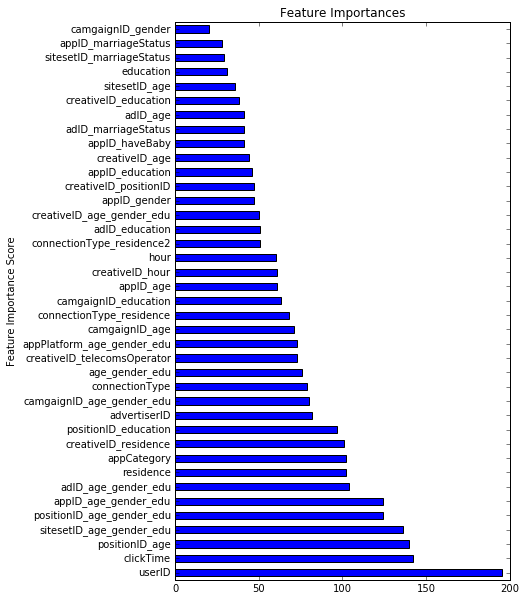

In [206]:
predictors = [x for x in train_X.columns if x not in ['label','conversionTime'
                                         ,'camgaignID' ,'adID_advertiserID'  , 'creativeID_sitesetID' ,'creativeID','sitesetID','residence2'
                                        ,'creativeID_haveBaby','day', 'creativeID_gender','adID','adID_gender', 'haveBaby','appID'
                                        ,'creativeID_residence2','age','sitesetID_positionType','sitesetID_haveBaby', 'marriageStatus'
                                        ,'appPlatform_age','adID_haveBaby','camgaignID_haveBaby', 'telecomsOperator','appPlatform_edu','age_gender' ]]xgb1 = XGBClassifier(
        learning_rate =0.1,
        n_estimators=1000,
        max_depth=4,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27)

alg=xgb1
dtrain=train_X
cv_folds=5
early_stopping_rounds=50
xgb_param = alg.get_xgb_params()
xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='logloss', early_stopping_rounds=early_stopping_rounds)
alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
alg.fit(dtrain[predictors], dtrain['label'],eval_metric='logloss')
         
feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='barh', title='Feature Importances',legend=False, figsize=(6, 10))
plt.ylabel('Feature Importance Score')

dtest=train[train.day.values==25]
dtest['predprob'] = alg.predict_proba(dtest[predictors])[:,1]



In [208]:
dtest=train[train.day.values==26]
dtest['predprob'] = alg.predict_proba(dtest[predictors])[:,1]

F:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


predictors = [x for x in train_X.columns if x not in ['label','conversionTime'
                                         ,'camgaignID' ,'adID_advertiserID'  , 'creativeID_sitesetID' ,'creativeID','sitesetID','residence2'
                                        ,'creativeID_haveBaby','day', 'creativeID_gender','adID','adID_gender', 'haveBaby','appID'
                                        ,'creativeID_residence2','age','sitesetID_positionType','sitesetID_haveBaby', 'marriageStatus'
                                        ,'appPlatform_age','adID_haveBaby','camgaignID_haveBaby', 'telecomsOperator','appPlatform_edu','age_gender'
                                                     ,'positionID_marriageStatus','sitesetID_gender','creativeID_marriageStatus','gender','positionID_gender',
                                                    'sitesetID_education', 'positionType', 'positionID','positionID_haveBaby','camgaignID_marriageStatus',  'appPlatform']]



loss(dtest['label'],dtest['predprob'])

In [209]:
loss(dtest['label'],dtest['predprob'])

0.024121382794789703

predictors = [x for x in train_X.columns if x not in ['label','conversionTime'
                                         ,'camgaignID' ,'adID_advertiserID'  , 'creativeID_sitesetID' ,'creativeID','sitesetID','residence2'
                                        ,'creativeID_haveBaby','day', 'creativeID_gender','adID','adID_gender', 'haveBaby','appID'
                                        ,'creativeID_residence2','age','sitesetID_positionType','sitesetID_haveBaby', 'marriageStatus'
                                        ,'appPlatform_age','adID_haveBaby','camgaignID_haveBaby', 'telecomsOperator','appPlatform_edu','age_gender' ]]
0.021414073468603186

loss(dtest['label'],dtest['predprob'])

In [90]:
train1=train.drop([
       'hour', 'residence2', 'creativeID_age', 'creativeID_gender',
       'creativeID_education', 'creativeID_marriageStatus',
       'creativeID_haveBaby', 'creativeID_residence', 'creativeID_hour',
       'creativeID_residence2', 'creativeID_hometown',
       'creativeID_positionID', 'creativeID_telecomsOperator',
       'creativeID_sitesetID', 'connectionType_residence',
       'connectionType_residence2', 'adID_age',
       'adID_gender', 'adID_education', 'adID_marriageStatus',
       'adID_haveBaby', 'creativeID_advertiserID', 'age_gender',
       'age_gender_edu', 'camgaignID_age', 'camgaignID_gender',
       'camgaignID_education', 'camgaignID_marriageStatus',
       'camgaignID_haveBaby', 'camgaignID_age_gender_edu',
       'adID_age_gender_edu', 'creativeID_age_gender_edu', 'appID_age',
       'appID_gender', 'appID_education', 'appID_marriageStatus',
       'appID_haveBaby', 'appID_age_gender_edu', 'appID_appPlatform',
       'appPlatform_age', 'appPlatform_edu', 'appPlatform_age_gender_edu',
       'positionID_age', 'positionID_gender', 'positionID_education',
       'positionID_marriageStatus', 'positionID_haveBaby',
       'positionID_age_gender_edu', 'sitesetID_age', 'sitesetID_gender',
       'sitesetID_education', 'sitesetID_marriageStatus',
       'sitesetID_haveBaby'],1)

In [92]:
del train1['sitesetID_age_gender_edu']

In [95]:
 train1[0:1]

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator,adID,camgaignID,...,gender,education,marriageStatus,haveBaby,hometown,residence,sitesetID,positionType,appCategory,day
0,0,170000,NaN,3089,2798058,293,1,1,1321,83,...,2,1,3,1,0,1301,0,3,108,17


In [88]:
train.hometown.value_counts()

SyntaxError: invalid syntax (<ipython-input-88-cf57d09bd566>, line 1)

In [98]:
train1.columns

Index([u'label', u'clickTime', u'conversionTime', u'creativeID', u'userID',
       u'positionID', u'connectionType', u'telecomsOperator', u'adID',
       u'camgaignID', u'advertiserID', u'appID', u'appPlatform', u'age',
       u'gender', u'education', u'marriageStatus', u'haveBaby', u'hometown',
       u'residence', u'sitesetID', u'positionType', u'appCategory', u'day'],
      dtype='object')

In [108]:
train1[train1.connectionType==0].shape[0]

train[train.age==0].shape[0]

train1[train1.telecomsOperator==0].shape[0]

train1[train1.appPlatform==0].shape[0]

train1[train1.gender==0].shape[0]

train1[train1.education==0].shape[0]

train1[train1.marriageStatus==0].shape[0]

train1[train1.haveBaby==0].shape[0]

train1[train1.hometown==0].shape[0]

train1[train1.residence==0].shape[0]

train1[train1.positionType==0].shape[0]

train1[train1.appCategory==0].shape[0]

54586

In [124]:
filter_t = np.logical_and(train1.age.values==0, train1.haveBaby.values ==0)

In [84]:
grp1 = train.groupby(['hometown'])
sum1 = grp1['label'].aggregate(np.sum)
cnt1 = grp1['label'].aggregate(np.size)
sum1.astype(float) /cnt1

hometown
0       0.020746
101     0.028782
102     0.023887
103     0.027868
104     0.029418
105     0.030524
106     0.028724
107     0.026367
108     0.029023
109     0.027293
110     0.030581
111     0.030204
112     0.028225
113     0.032104
114     0.026550
115     0.029348
116     0.026663
117     0.023162
118     0.028424
201     0.025962
202     0.030440
203     0.030314
204     0.024072
205     0.026052
206     0.028584
207     0.029450
208     0.029630
209     0.029143
210     0.028134
211     0.023219
          ...   
2813    0.010101
2901    0.026114
2902    0.027493
2903    0.032795
2904    0.030246
2905    0.027984
3001    0.030083
3002    0.032230
3003    0.032143
3004    0.035055
3005    0.046392
3006    0.027875
3007    0.044335
3008    0.006757
3101    0.037037
3102    0.016461
3103    0.017316
3104    0.021277
3105    0.031414
3106    0.013889
3107    0.010753
3201    0.027228
3202    0.013333
3203    0.032967
3204    0.030303
3205    0.021739
3206    0.021739
3207 

In [5]:
train2=train1.drop(['label','hour','sitesetID'],1)

train2['zreo']=train2.apply(lambda x: sum(x==0),1)

train2['zreo'].value_counts()

In [8]:
train2.zreo.values.shape

(3303872L,)

In [9]:
filter_t = np.logical_and(train2.zreo.values>=0, train2.zreo.values <=2)

train_all= train1.ix[filter_t, :]

train_all.label.value_counts()

In [12]:
train_all.to_csv('train_pre.csv',index=False)

In [15]:
train_all.shape

(3273158, 19)

In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [2]:
train_all=pd.read_csv('train_pre.csv')

In [16]:
ft=np.logical_and(train_all.day.values>=17,train_all.day.values<=24)

train_Small = train_all.ix[ft, :]

train_Small.label.value_counts()

In [21]:
np.random.seed(999)
r1 = np.random.uniform(0, 1, train_Small.shape[0])
train_X = train_Small.ix[r1 < 0.01, :]

In [22]:
train_X.shape

(16952, 19)

In [48]:
train_X['label'].values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [127]:
test_X = train_all.ix[train_all.day.values==25]

In [128]:
np.random.seed(999)
r1 = np.random.uniform(0, 1, test_X.shape[0])
test_X = test_X.ix[r1 < 0.5, :]

In [129]:
test_X.shape[0]

112313

In [130]:
test_results=test_X

                        预处理

In [22]:
test=pd.merge(test,ad,on='creativeID')
test=pd.merge(test,user,on='userID')
test=pd.merge(test,position,on='positionID')
test=pd.merge(test,app_categories,on='appID')
test['day']=test.clickTime.values/10000
test['hour']=test.clickTime.values/100%100
del test['label']

KeyError: 'appID'

In [11]:
test_results=pd.read_csv("test.csv")
del test_results['label']

In [120]:
import math
def loss(label,pro):
    label1=label.values
    pro1=pro
    prob1=pro.apply(lambda x: math.log(x)).values
    prob2=pro1.apply(lambda x:math.log(1-x)).values
    Loss=-np.mean((label1*pro1)+(1-label1)*prob2)
    return Loss

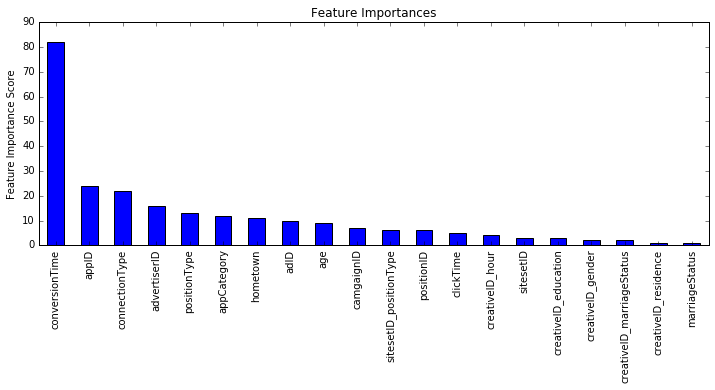


 线上
 results = test_results.merge(dtest[['instanceID','predprob']], on='instanceID')

In [43]:
target='label'
day='day'
id='instanceID'

In [140]:
ft=np.logical_and(train.day.values>=17,train.day.values<=24)
train_X = train.ix[ft, :]
np.random.seed(999)
r1 = np.random.uniform(0, 1, train_X.shape[0])
train_X = train_X.ix[r1 < 0.1, :]

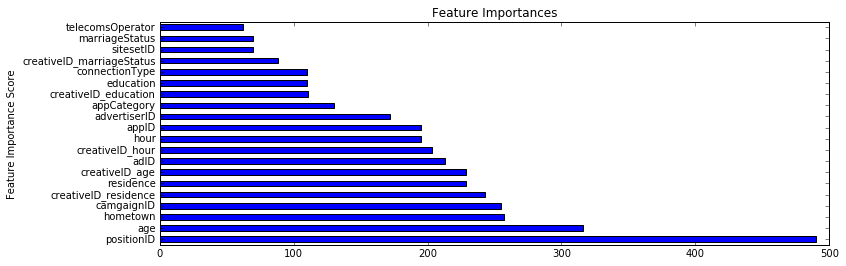

In [141]:
predictors = [x for x in train_X.columns if x not in [target,day,'conversionTime','clickTime','userID','appPlatform','creativeID'
                                                     ,'creativeID_haveBaby','sitesetID_positionType','positionType','creativeID_gender','haveBaby'
                                                     ,'gender']]
xgb1 = XGBClassifier(
        learning_rate =0.1,
        n_estimators=1000,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27)

alg=xgb1
dtrain=train_X
cv_folds=5
early_stopping_rounds=50
xgb_param = alg.get_xgb_params()
xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='logloss', early_stopping_rounds=early_stopping_rounds)
alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
alg.fit(dtrain[predictors], dtrain['label'],eval_metric='logloss')
         
feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='barh', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [142]:
dtest=train[train.day.values==25]
dtest['predprob'] = alg.predict_proba(dtest[predictors])[:,1]

loss(dtest['label'],dtest['predprob'])

F:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [136]:
loss(dtest['label'],dtest['predprob'])

0.023381596097913845

In [139]:
loss(dtest['label'],dtest['predprob'])

0.023271018811995146

In [133]:
loss(dtest['label'],dtest['predprob'])

0.023383257231899646

In [ ]:
feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='barh', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [ ]:
modelfit(xgb1, train_X, test_X, predictors)

In [56]:
param_test1 = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
                                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                       param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train_X[predictors],train_X[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.48031, std: 0.15007, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.48739, std: 0.14617, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.47545, std: 0.15254, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.47915, std: 0.15291, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.48110, std: 0.15103, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.47370, std: 0.15624, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.47473, std: 0.15199, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.47827, std: 0.15100, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.47371, std: 0.15439, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.47019, std: 0.15180, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.46955, std: 0.15169, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.46830, std: 0.15557, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 3, 'min_child_weight': 3

In [57]:
grd_enc = OneHotEncoder()

NameError: name 'OneHotEncoder' is not defined

In [58]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression


In [59]:
grd_enc = OneHotEncoder()

In [60]:
grd_lm = LogisticRegression()

In [ ]:
grd_enc = OneHotEncoder()
# 调用LR分类模型。
grd_lm = LogisticRegression()


'''使用X_train训练GBDT模型，后面用此模型构造特征'''
grd.fit(X_train, y_train)

# fit one-hot编码器
grd_enc.fit(alg.apply(dtrain[predictors])[:, :, 0])

''' 
使用训练好的GBDT模型构建特征，然后将特征经过one-hot编码作为新的特征输入到LR模型训练。
'''
grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]), y_train_lr)
# 用训练好的LR模型多X_test做预测
y_pred_grd_lm = grd_lm.predict_proba(grd_enc.transform(grd.apply(X_test)[:, :, 0]))[:, 1]
# 根据预测结果输出
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, y_pred_grd_lm)

In [15]:
results = test_results.merge(test[['instanceID','predprob']], on='instanceID')

In [16]:
results

,instanceID,label,clickTime,creativeID,userID,positionID,connectionType,telecomsOperator,predprob
0,1,-1,310000,3745,1164848,3451,1,3,0.004124
1,2,-1,310000,2284,2127247,1613,1,3,0.001383
2,3,-1,310000,1456,2769125,5510,2,1,0.004020
3,4,-1,310000,4565,9762,4113,2,3,0.008154
4,5,-1,310000,49,2513636,3615,1,3,0.000459
5,6,-1,310000,3824,488035,3821,1,1,0.044990
6,7,-1,310000,863,225561,4188,1,3,0.028224
7,8,-1,310000,4469,1144620,4113,1,1,0.038953
8,9,-1,310000,3745,1113275,3347,1,2,0.003076
9,10,-1,310000,4565,1361729,2426,2,2,0.008091


In [18]:
import zipfile
df = pd.DataFrame({"instanceID": results["instanceID"].values, "proba":results["predprob"].values})
df.sort_values("instanceID", inplace=True)
df.to_csv("submission.csv", index=False)
with zipfile.ZipFile("submission.zip", "w") as fout:
    fout.write("submission.csv", compress_type=zipfile.ZIP_DEFLATED)

In [9]:
test_X.shape,train_X.shape

((224769, 19), (1642649, 19))

In [10]:
np.random.seed(999)
r1 = np.random.uniform(0, 1, train_X.shape[0])
train_X = train_X.ix[r1 < 0.1, :]

In [11]:
np.random.seed(999)
r1 = np.random.uniform(0, 1, test_X.shape[0])
test_X = test_X.ix[r1 < 0.1, :]

In [12]:
train_X[0:1]

,label,creativeID,positionID,connectionType,telecomsOperator,adID,camgaignID,advertiserID,appID,appPlatform,age,gender,education,residence,sitesetID,positionType,appCategory,day,hour
4,0,3828,293,1,1,3313,83,10,434,1,21,2,1,1301,0,3,108,19,18


In [13]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [14]:
target='label'
day='day'
id='instanceID'

In [15]:
test_X['ID']=test_X.index

In [16]:
train_X['label'].value_counts()

0    160139
1      4313
Name: label, dtype: int64

In [25]:
test_results=test_X

In [17]:
def modelfit(alg, dtrain, dtest, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        xgtest = xgb.DMatrix(dtest[predictors].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['label'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['label'].values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['label'], dtrain_predprob)
    
#     Predict on testing data:
    dtest['predprob'] = alg.predict_proba(dtest[predictors])[:,1]
    print 'AUC Score (Test): %f' % metrics.roc_auc_score(dtest['label'], dtest['predprob'])
                
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.9738
AUC Score (Train): 0.845101
AUC Score (Test): 0.780241


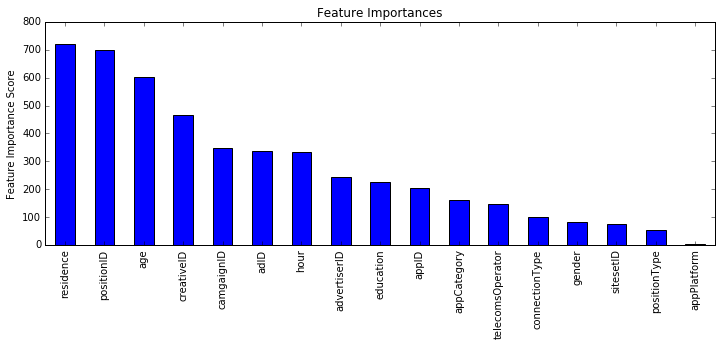

In [19]:
predictors = [x for x in train_X.columns if x not in [target,day]]
xgb1 = XGBClassifier(
        learning_rate =0.1,
        n_estimators=1000,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27)
modelfit(xgb1, train_X, test_X, predictors)

In [21]:
test_X['ss']=test_X.label.values

In [46]:
alg.fit(dtrain[predictors], dtrain['label'],eval_metric='auc')

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=58, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8)

In [47]:
dtrain_predictions = alg.predict(dtrain[predictors])

In [48]:
dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]

In [49]:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['label'].values, dtrain_predictions)
print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['label'], dtrain_predprob)


Model Report
Accuracy : 0.9739
AUC Score (Train): 0.839961


In [50]:
dtest['predprob'] = alg.predict_proba(dtest[predictors])[:,1]
results = test_results.merge(dtest[['ID','predprob']], on='ID')

In [53]:
del results['predprob_y'] 

In [54]:
results = test_results.merge(dtest[['ID','predprob']], on='ID')

In [58]:
results=test_results

In [59]:
 print 'AUC Score (Test): %f' % metrics.roc_auc_score(results['label'], results['predprob'])
         

AUC Score (Test): 0.758705


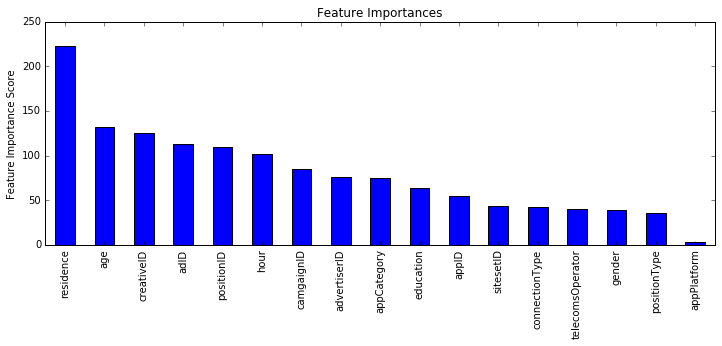

In [60]:
feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [ ]:
test['zreo']=test.apply(lambda x: sum(x==0),1)

In [3]:
train[0:5]

,label,clickTime,creativeID,userID,positionID,connectionType,telecomsOperator,adID,camgaignID,advertiserID,...,education,marriageStatus,haveBaby,hometown,residence,sitesetID,positionType,appCategory,day,hour
0,0,170000,3089,2798058,293,1,1,1321,83,10,...,1,3,1,0,1301,0,3,108,17,0
1,0,180028,3089,1683269,293,2,3,1321,83,10,...,0,1,0,2109,1303,0,3,108,18,0
2,0,191045,3089,240899,293,1,2,1321,83,10,...,1,3,0,1303,1004,0,3,108,19,10
3,0,202250,5970,2270688,293,1,2,612,83,10,...,1,3,0,0,1303,0,3,108,20,22
4,0,191858,3828,1627759,293,1,1,3313,83,10,...,1,0,0,1301,1301,0,3,108,19,18


In [18]:
test=pd.merge(test,ad,on='creativeID')
test=pd.merge(test,user,on='userID')
test=pd.merge(test,position,on='positionID')
test=pd.merge(test,app_categories,on='appID')
test['day']=test.clickTime.values/10000
test['hour']=test.clickTime.values/100%100

In [19]:
test[0:5]

,instanceID,label,clickTime,creativeID,userID,positionID,connectionType,telecomsOperator,adID,camgaignID,...,education,marriageStatus,haveBaby,hometown,residence,sitesetID,positionType,appCategory,day,hour
0,1,-1,310000,3745,1164848,3451,1,3,1166,430,...,1,0,1,605,605,0,1,2,31,0
1,178,-1,310001,3745,2170066,3451,1,2,1166,430,...,2,0,1,906,906,0,1,2,31,0
2,21839,-1,310524,3745,786179,3451,1,1,1166,430,...,3,2,1,604,604,0,1,2,31,5
3,25947,-1,310623,3745,1467866,3451,1,3,1166,430,...,5,1,0,305,305,0,1,2,31,6
4,26757,-1,310631,3745,1230630,3451,1,3,1166,430,...,3,2,0,0,0,0,1,2,31,6


In [13]:
train.columns

Index([u'label', u'clickTime', u'creativeID', u'userID', u'positionID',
       u'connectionType', u'telecomsOperator', u'adID', u'camgaignID',
       u'advertiserID', u'appID', u'appPlatform', u'age', u'gender',
       u'education', u'marriageStatus', u'haveBaby', u'hometown', u'residence',
       u'sitesetID', u'positionType', u'appCategory', u'day', u'hour'],
      dtype='object')

In [20]:
train['source']= 'train'
test['source'] = 'test'
data=pd.concat([train, test],ignore_index=True)
data.shape

(4088017, 26)

In [14]:
test.columns

Index([u'instanceID', u'label', u'clickTime', u'creativeID', u'userID',
       u'positionID', u'connectionType', u'telecomsOperator', u'adID',
       u'camgaignID', u'advertiserID', u'appID', u'appPlatform', u'age',
       u'gender', u'education', u'marriageStatus', u'haveBaby', u'hometown',
       u'residence', u'sitesetID', u'positionType', u'appCategory', u'day',
       u'hour'],
      dtype='object')

In [30]:
data['zreo']=data.apply(lambda x: sum(x==0),1)


In [33]:
data[0:1]

,adID,advertiserID,age,appCategory,appID,appPlatform,camgaignID,clickTime,connectionType,creativeID,...,label,marriageStatus,positionID,positionType,residence,sitesetID,source,telecomsOperator,userID,zreo
0,1321,10,25,108,434,1,83,170000,1,3089,...,0,3,293,3,1301,0,train,1,2798058,4


拼接 train ，test 数据

In [35]:
data['zreo'].value_counts()

3     1306306
4     1112352
5      584495
2      355861
6      310122
7      195755
8      147598
9       48662
1       24143
10       2537
0         116
11         70
Name: zreo, dtype: int64

In [48]:
target='label'
id='instanceID'

In [15]:
train['age'].value_counts()

0     445656
15    198469
16    158922
13    153770
17    152810
19    146127
14    142515
20    142457
18    141921
25    127243
21    122891
26    120452
12    119651
22    117684
23    112739
27    109965
11    106428
28    103916
24    103333
29     88676
30     71968
31     62085
33     56213
32     54274
10     53877
34     44333
35     43804
36     39018
37     35084
38     28754
       ...  
6       5625
5       4926
54      3240
55      3193
4       2773
56      2714
57      2605
58      2359
59      2040
60      1604
61      1393
62       672
63       462
66       440
65       403
64       368
67       337
68       257
80       256
71       181
70       171
69       171
74       168
72       141
78       130
73       130
76       121
77       116
75       101
79        68
Name: age, dtype: int64

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数


[None]

In [ ]:
train.age[train.label==1].plot(kind='bar')
train.age[train.label==0].plot(kind='bar')

In [19]:
plt.show()

In [56]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [60]:
def modelfit(alg, dtrain, dtest, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        xgtest = xgb.DMatrix(dtest[predictors].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['label'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['label'].values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['label'], dtrain_predprob)
    
#     Predict on testing data:
    dtest['predprob'] = alg.predict_proba(dtest[predictors])[:,1]
    results = test_results.merge(dtest[['instanceID','predprob']], on='instanceID')
    print 'AUC Score (Test): %f' % metrics.roc_auc_score(results['label'], results['predprob'])
                
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [58]:
predictors = [x for x in train.columns if x not in [target]]

In [ ]:
xgb1 = XGBClassifier(
        learning_rate =0.1,
        n_estimators=1000,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27)
modelfit(xgb1, train, test, predictors)


Model Report
Accuracy : 0.9752
AUC Score (Train): 0.818981


NameError: global name 'test_results' is not defined

In [ ]:
 feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')